# Project: Investigate Medical Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.It contains 14 columns and 110527 row.
## Content
>  ### The target feature is
>- No_SHow
### The feature sets are:
>- PatientId
>- AppointmentID 	
>- Gender 	
>- ScheduledDay 
>- AppointmentDay 
>- Age 	
>- Neighbourhood 	
>- Scholarship 	
>- Hipertension 	
>- Diabetes 	
>- Alcoholism 	
>- Handcap 	
>- SMS_received

### Questions to Answer:
<ul>
<li><a href="#q1">What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</a></li>
<li><a href="#q2">Which Neighbourhood has the largest number of appointment ?</a></li>


</ul>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this section we will load data and perform some cleaning for the data finding duplicates and missing value editing the data type of the columns

In [2]:
#load data to pandas dataframe
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
#show first five rows 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#make columns name with small letter to be easily accessible
df.rename(columns=lambda x: x.lower().replace('-','_'), inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [5]:
#number of rows and columns
df.shape

(110527, 14)

In [6]:
#some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#some statistical information about data
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#correct the datatype of dates 
df.scheduledday=pd.to_datetime(df.scheduledday)
df.appointmentday=pd.to_datetime(df.appointmentday)

In [9]:
#To make column no show more clear 
df.rename(columns={'no_show':'show'},inplace=True)
x=df.show.value_counts()
#rename the column to be Show and exchange values of it 
df.show=df.show.replace('Yes','2')
df.show=df.show.replace('No','Yes')
df.show=df.show.replace('2','No')
y=df.show.value_counts()
#show value counts of Yes and No
print('Before:\n {}\nAfter:\n{}\n'.format(x,y))

Before:
 No     88208
Yes    22319
Name: show, dtype: int64
After:
Yes    88208
No     22319
Name: show, dtype: int64



In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
show              0
dtype: int64

In [12]:
#Number of 0 values 
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  patientid  is :  0
Count of zeros in column  appointmentid  is :  0
Count of zeros in column  gender  is :  0
Count of zeros in column  scheduledday  is :  0
Count of zeros in column  appointmentday  is :  0
Count of zeros in column  age  is :  3539
Count of zeros in column  neighbourhood  is :  0
Count of zeros in column  scholarship  is :  99666
Count of zeros in column  hipertension  is :  88726
Count of zeros in column  diabetes  is :  102584
Count of zeros in column  alcoholism  is :  107167
Count of zeros in column  handcap  is :  108286
Count of zeros in column  sms_received  is :  75045
Count of zeros in column  show  is :  0


In [13]:
#Search for outliers
x=df.query('age <=0 | age >= 100')
x.age.value_counts()

 0      3539
 115       5
 100       4
 102       2
-1         1
Name: age, dtype: int64

In [14]:
#remove this ouliers as no one can be 0 age 
df= df[(df.age > 0) & (df.age <= 100)]
df.shape

(106980, 14)

In [15]:
# Create appointment_dow column
df['appointment_day'] = df.appointmentday.dt.day_name()
df['appointment_month']=df.appointmentday.dt.month_name()
# Check the values
df['appointment_day'].value_counts()
df['appointment_month'].value_counts()

May      78197
June     25679
April     3104
Name: appointment_month, dtype: int64

In [16]:
df.neighbourhood.nunique()

81

- <font size="4">Now our Data is clean and ready for analysis</font>

<a id='eda'></a>
## Exploratory Data Analysis
<font size="4">In this section we will visualize data and answer question about data</font>

<a id='q1'></a>
### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

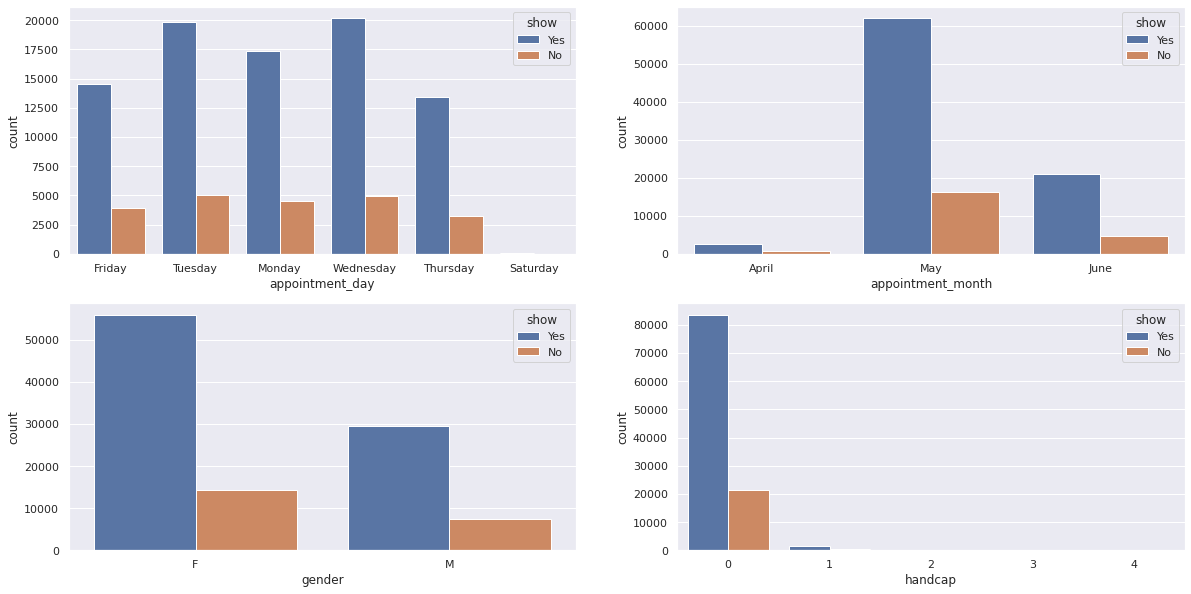

In [17]:
sns.set_style()
sns.set(font_scale = 20)
sns.set(rc={'figure.figsize':(20,10)})
#make list with columns we want to plot it 
lista=["appointment_day","appointment_month","gender","handcap"]
#make a for loop to iterate over the column and make countplot
#
for i in range(len(lista)):
    plt.subplot(i+221)
    x = sns.countplot(x=df[lista[i]], hue=df.show, data=df)
plt.show()

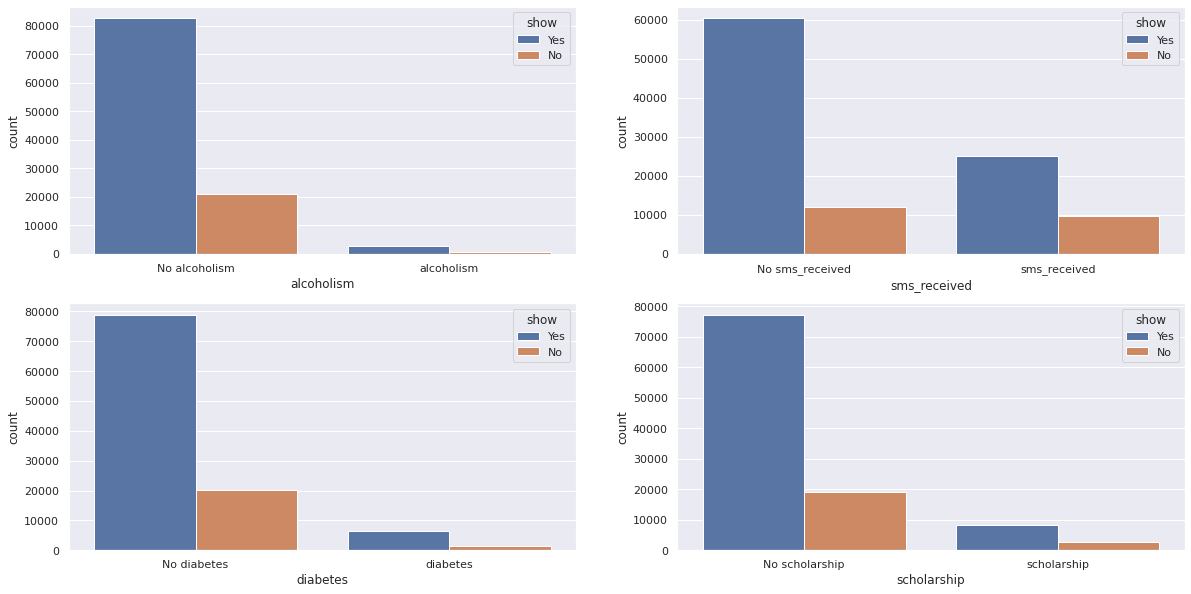

In [18]:
#make list with columns we want to plot it
lista2=["alcoholism","sms_received","diabetes",'scholarship']
#make a for loop to iterate over the column and make countplot
for i in range(len(lista)):
    plt.subplot(i+221)
    x = sns.countplot(x=df[lista2[i]], hue=df.show, data=df)
    x.set_xticklabels(["No {}".format(lista2[i]), lista2[i]])
    
plt.show()

># Observation:
We can observe that patients without any thing is more to show up for their scheduled appointment

<a id='q2'></a>
## Which Neighbourhood has the largest number of appointment ?

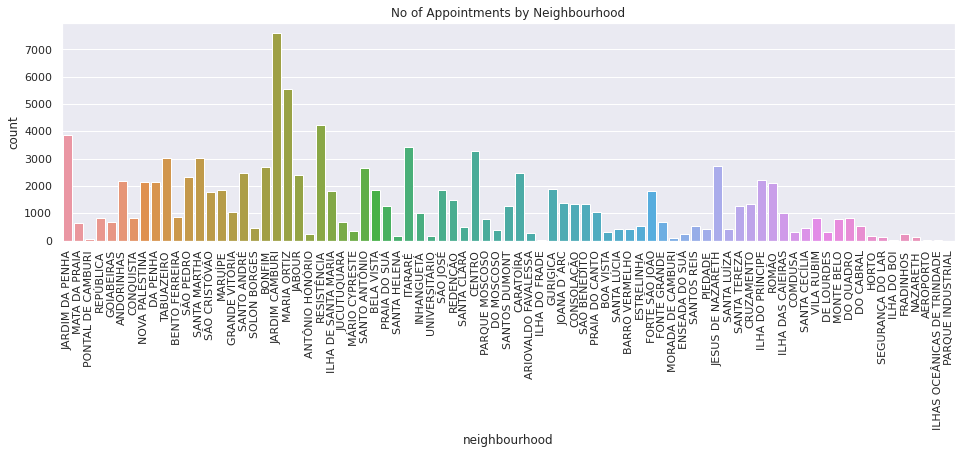

In [19]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=(df.neighbourhood))
ax.set_title("No of Appointments by Neighbourhood")
plt.show()

<font size="3">Neighbourhood affect the patient appointment.
Jardim Camburi has the largest number of appointments</font>

<a id='conclusions'></a>

# Conclusions
#### <font size="3">It's been interesting analyzing the The Appointment Medical Database i learned so many thins when doing process</font>.
#### <font size='3'> i found that</font>:

- Patients without any thing is more to show up for their scheduled appointment
- Jardim Camburi has the largest number of appointments
- Neighbourhood affect the patient appointment.

# Limitations

>Missing features that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient is employeed or not , or whether the patient have a series medical issue or not.

# Resources
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html